In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [ ]:
def our_cross_entropy (t,p):
    return np.mean(-np.sum(t*np.log(p+0.00000005),axis=1,keepdims=True))

In [ ]:
t=np.array([[0,1],
   [1,0],
   [0,1]])

p=np.array([[0.7,.3],
   [.8,.2],
   [.8,.2]])
print(our_cross_entropy (t,p))
print(our_cross_entropy (t,p).shape)

1.0121845963025422
()


In [ ]:
def our_soft_max(x):
    x=x-np.max(x,axis=1,keepdims=True)
    upper=np.exp(x)
    lower=np.sum(upper,axis=1,keepdims=True)
    return upper/lower

In [ ]:
x=[[0.7,.3],
   [.8,.2],
   [.8,.2]]

print(our_soft_max(x))

[[0.59868766 0.40131234]
 [0.64565631 0.35434369]
 [0.64565631 0.35434369]]


In [ ]:
def our_tanh(x):
    upper=np.exp(x)-np.exp(-x)
    lower=np.exp(x)+np.exp(-x)
    return upper/lower

In [ ]:
x=np.array([[0.7,.3],
   [.8,.2],
   [.8,.2]])

print(our_tanh(x))

[[0.60436778 0.29131261]
 [0.66403677 0.19737532]
 [0.66403677 0.19737532]]


In [ ]:
np.tanh(x)

array([[0.60436778, 0.29131261],
       [0.66403677, 0.19737532],
       [0.66403677, 0.19737532]])

In [ ]:
def our_dtanh(x):
    return 1-x**2

In [ ]:
x=np.array([[0.7,.3],
   [.8,.2],
   [.8,.2]])

print(our_dtanh(x))

[[0.51 0.91]
 [0.36 0.96]
 [0.36 0.96]]


In [ ]:
np.random.seed(0)

In [ ]:
def our_initial ():

    w1 = np.random.randn(784,20)
    b1 = np.zeros((1, 20))

    w2 = np.random.randn(20,15)
    b2 = np.zeros((1, 15))

    w3 = np.random.randn(15,10)
    b3 = np.zeros((1, 10))

    return w1,b1,w2,b2,w3,b3

In [ ]:
w1,b1,w2,b2,w3,b3= our_initial ()
w1

array([[ 1.76405235,  0.40015721,  0.97873798, ..., -0.20515826,
         0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , ...,  1.20237985,
        -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019, ...,  0.3024719 ,
        -0.63432209, -0.36274117],
       ...,
       [-0.57230368,  0.19457791,  0.49349517, ..., -1.89576424,
        -0.54624122, -0.32782539],
       [ 0.41814034, -0.80276784, -0.12488406, ...,  1.11501463,
         0.7628927 ,  0.71863949],
       [ 2.06086561, -1.14270876, -0.67209559, ..., -0.64715769,
        -0.85307969,  0.25300796]])

In [ ]:
def our_forward (x,w1,b1,w2,b2,w3,b3):
    n1=x@w1+b1
    o1=our_tanh(n1)

    n2=o1@w2+b2
    o2=our_tanh(n2)

    n3=o2@w3+b3
    o3=our_soft_max(n3)

    return n1,o1,n2,o2,n3,o3

In [ ]:
def our_backprob(x,y,w1,b1,w2,b2,w3,b3,n1,o1,n2,o2,n3,o3):

    de_dn3= o3 - y

    de_do2= de_dn3 @ w3.T

    de_dn2= de_do2 * our_dtanh(o2)

    de_do1= de_dn2 @ w2.T

    de_dn1= de_do1 * our_dtanh(o1)


    de_dw3= o2.T @ de_dn3

    de_db3= np.sum(de_dn3,axis=0,keepdims=True)

    de_dw2= o1.T @ de_dn2

    de_db2= np.sum(de_dn2,axis=0,keepdims=True)

    de_dw1= x.T @ de_dn1

    de_db1= np.sum(de_dn1,axis=0,keepdims=True)


    return  de_dw1,de_db1,de_dw2,de_db2,de_dw3,de_db3

In [ ]:
def our_update_weights(lr,w1,b1,w2,b2,w3,b3,de_dw1,de_db1,de_dw2,de_db2,de_dw3,de_db3):

    w1-=lr*de_dw1

    b1-=lr*de_db1

    w2-=lr*de_dw2

    b2-=lr*de_db2

    w3-=lr*de_dw3

    b3-=lr*de_db3

    return w1,b1,w2,b2,w3,b3

In [ ]:
def our_accuracy (t,p):
    predicted_y = np.argmax(p,axis=1)

    true_t= np.argmax(t,axis=1)    #because one hot encoding

    true_v=np.sum(true_t==predicted_y)

    total_v= predicted_y.shape[0]

    our_accuracy_v = true_v / total_v  #accuracy_score(true_t,predicted_y)   #

    return our_accuracy_v

In [ ]:
t=np.array([[1,0,0],[0,1,0],[0,0,1]])
p=np.array([[.8,.1,.1],[.8,.1,.1],[.1,.1,.8]])
print(our_accuracy (t,p))

0.6666666666666666


In [ ]:
def our_evaluation (x_eval,y_eval,w1,b1,w2,b2,w3,b3) :

    n1,o1,n2,o2,n3,o3 = our_forward(x_eval,w1,b1,w2,b2,w3,b3)

    loss_v = our_cross_entropy(y_eval,o3)

    our_accuracy_v = our_accuracy(y_eval,o3)

    return loss_v ,our_accuracy_v


In [ ]:
def our_batch_gradient_decent(x_train,y_train,x_test,y_test,batch_size=32,lr=1e-2,check_v=0.00001,max_epoch=20):

    w1,b1,w2,b2,w3,b3=our_initial ()

    n_batchs= len(x_train) // batch_size

    train_loss_l=[]
    test_loss_l=[]

    for epoch in range(max_epoch):

        for batch in range(n_batchs):

            start= batch * batch_size
            end=(batch+1) * batch_size

            if batch+1 !=n_batchs:

                x_batch=x_train[start:end]
                y_batch=y_train[start:end]

            else:

                x_batch=x_train[start: ]
                y_batch=y_train[start: ]

            n1,o1,n2,o2,n3,o3 = our_forward(x_batch,w1,b1,w2,b2,w3,b3)

            de_dw1,de_db1,de_dw2,de_db2,de_dw3,de_db3 = our_backprob(x_batch,y_batch,w1,b1,w2,b2,w3,b3,n1,o1,n2,o2,n3,o3)

            w1,b1,w2,b2,w3,b3 = our_update_weights(lr,w1,b1,w2,b2,w3,b3,de_dw1,de_db1,de_dw2,de_db2,de_dw3,de_db3)


        train_loss,our_train_accuracy = our_evaluation (x_train,y_train,w1,b1,w2,b2,w3,b3)

        train_loss_l.append(train_loss)

        test_loss,our_test_accuracy = our_evaluation (x_test,y_test,w1,b1,w2,b2,w3,b3)

        test_loss_l.append(test_loss)


        print(f"at epoch = {epoch} , train loss = {train_loss}, test loss = {test_loss} ,train accuracy = {our_train_accuracy} , test accuracy = {our_test_accuracy}")


    return w1,b1,w2,b2,w3,b3,train_loss_l,test_loss_l

In [ ]:
def our_prep_data(x_dir,y_dir):

    x=np.load(x_dir)
    y=np.load(y_dir)

    x=x / 255.0

    ohe=OneHotEncoder(sparse=False)

    y_ohe=ohe.fit_transform(y.reshape(-1,1))

    x_train,x_test,y_train,y_test=train_test_split(x,y_ohe,test_size=0.2,random_state=42)

    return x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test,y_train,y_test = our_prep_data(x_dir="D:\Courses\ML Dr Mostafa\Projects_last\mnist-sample\X.npy",y_dir="D:\Courses\ML Dr Mostafa\Projects_last\mnist-sample\y.npy")

w1,b1,w2,b2,w3,b3,train_loss_l,test_loss_l = our_batch_gradient_decent(x_train,y_train,x_test,y_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


at epoch = 0 , train loss = 1.5155286445295257, test loss = 1.663513409106682 ,train accuracy = 0.48525 , test accuracy = 0.43
at epoch = 1 , train loss = 1.1949075656772636, test loss = 1.315498767936373 ,train accuracy = 0.6 , test accuracy = 0.533
at epoch = 2 , train loss = 0.9860204437597846, test loss = 1.1367266507775389 ,train accuracy = 0.67775 , test accuracy = 0.607
at epoch = 3 , train loss = 0.8810799368442777, test loss = 1.068325096820697 ,train accuracy = 0.71 , test accuracy = 0.642
at epoch = 4 , train loss = 0.7861880993119402, test loss = 0.9733853650279083 ,train accuracy = 0.74375 , test accuracy = 0.697
at epoch = 5 , train loss = 0.7191860620439555, test loss = 0.9338061159420643 ,train accuracy = 0.77375 , test accuracy = 0.706
at epoch = 6 , train loss = 0.6681399566242272, test loss = 0.8887579410995168 ,train accuracy = 0.78725 , test accuracy = 0.723
at epoch = 7 , train loss = 0.610170766878526, test loss = 0.8624767090981363 ,train accuracy = 0.807 , test

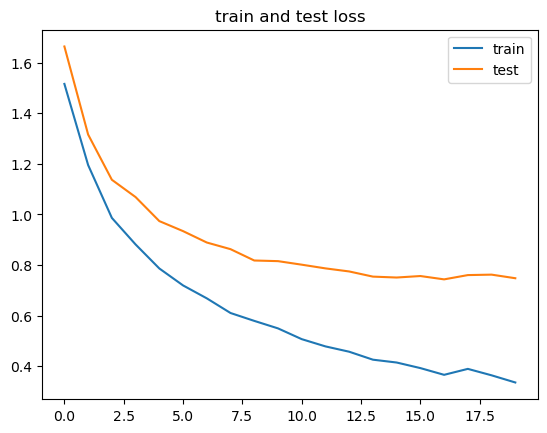

In [ ]:
def our_plot_loss(train_loss_l,test_loss_l):
    plt.plot(train_loss_l,label="train")
    plt.plot(test_loss_l,label="test")
    plt.legend()
    plt.title("train and test loss")
    plt.show()

our_plot_loss(train_loss_l,test_loss_l)

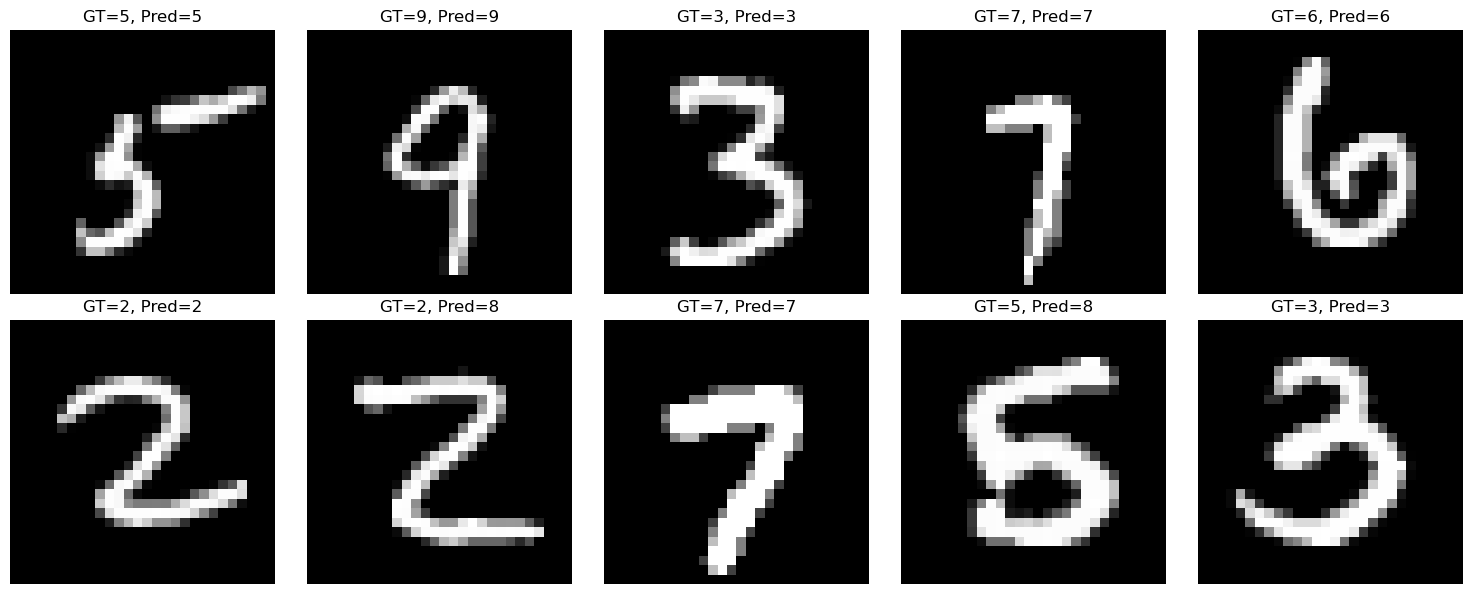

In [ ]:
def our_plot(x, y, w1, b1, w2, b2, w3, b3):
    num_images = 10
    rows = int(np.ceil(num_images / 5))
    cols = 5

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()

    for i in range(num_images):
        n1, o1, n2, o2, n3, o3 = our_forward(x[i], w1, b1, w2, b2, w3, b3)
        t = np.argmax(y[i])
        p = np.argmax(o3)

        axes[i].imshow(x[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"GT={t}, Pred={p}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

our_plot(x_test, y_test, w1, b1, w2, b2, w3, b3)